In [21]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import torch
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

In [2]:
mnase = pd.read_hdf('data/mnase_seq_merged_sampled.h5.z')

In [3]:
orfs = pd.read_csv('data/orfs_cd_paper_dataset.csv').set_index('orf_name')

In [4]:
mnase_0 = mnase[mnase.time == 0.0]
mnase_120 = mnase[mnase.time == 120.0]

In [8]:
gene = orfs.loc['YPR167C']

In [166]:
from src.vit_img_gen import ViTImgGen

# Partitions lengths of fragments into equal sized (length-wise) patches
# Small fragments: 30-79
# Intermediate fragments: 80-129
# Nucleosomal fragments: 130-200
len_cuts = [45, 90, 140, 201]
window = 1024

# Window = 1024
# Resize = 64   (16 downscale)
# Patch size = 4
# 64 / 4 = 16 column patches
# 1024 / 16 = 64 bps per patch
# 12x64 shaped images
patch_size = 8
sublength_resize_height = patch_size # times 3 vertical patches of height
img_width = 128

vit_gen = ViTImgGen(mnase_120, window, sublength_resize_height, len_cuts,
                    img_width, patch_size)


In [214]:
from src.find_small_plus1 import shift_for_p1

img, scaled_img, smoothed, img_slices, p1 = vit_gen.get_mnase_img(gene)

(156, 1728)
(156, 1024)


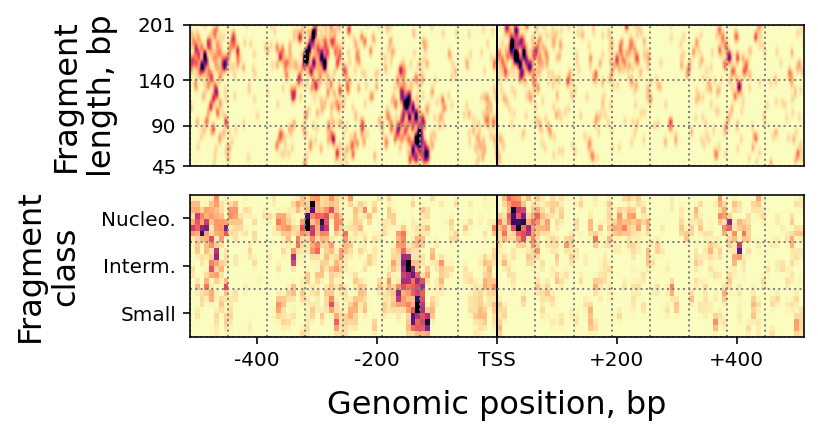

In [216]:
vit_gen.plot_resized_img()

In [171]:
from src.vit_data import load_cd_data_24x128
vit_data = load_cd_data_24x128()

In [182]:
from src.vit_data import load_cd_data_24x128_p1
vit_data_p1 = load_cd_data_24x128_p1()

Text(0.5, 1.0, 'Shifted onto +1')

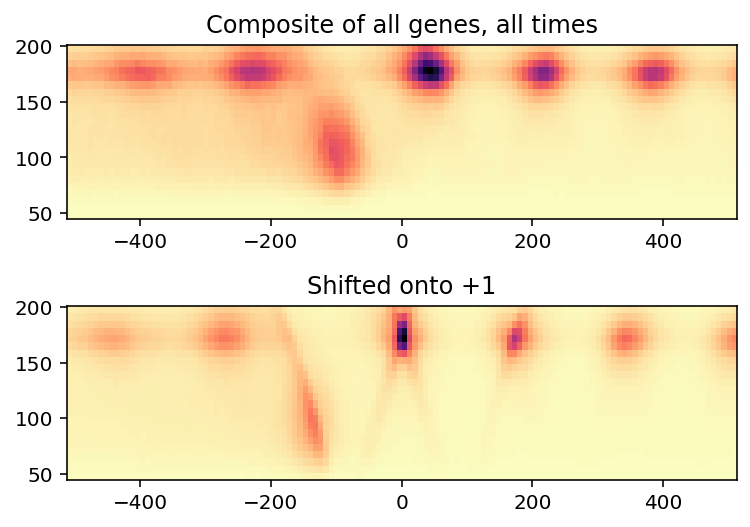

In [193]:
fig = plt.figure(figsize=(6, 4))
fig.tight_layout(rect=[0.05, 0.05, 0.95, 0.95])
plt.subplots_adjust(hspace=0.5, wspace=0.5)
    
plt.subplot(2, 1, 1)
composite = vit_data.all_imgs.sum(axis=0)[0]
plt.imshow(composite, cmap='magma_r', origin='lower', aspect='auto', extent=[-512, 512, 45, 201])
plt.title("Composite of all genes, all times")

plt.subplot(2, 1, 2)
composite = vit_data_p1.all_imgs.sum(axis=0)[0]
plt.imshow(composite, cmap='magma_r', origin='lower', aspect='auto', extent=[-512, 512, 45, 201])
plt.title("Shifted onto +1")


In [141]:
from src.vit_data import load_cd_data_24x128_p1

vit_data = load_cd_data_24x128_p1(replicate_mode='merge', predict_tpm='logfold')

In [142]:
vit_data.TPM.shape

(26562,)

(array([1.100e+02, 7.320e+02, 1.717e+03, 1.686e+04, 5.742e+03, 1.057e+03,
        2.510e+02, 7.900e+01, 6.000e+00, 8.000e+00]),
 array([-4.75651293, -3.49489388, -2.23327483, -0.97165579,  0.28996326,
         1.55158231,  2.81320135,  4.0748204 ,  5.33643945,  6.59805849,
         7.85967754]),
 <BarContainer object of 10 artists>)

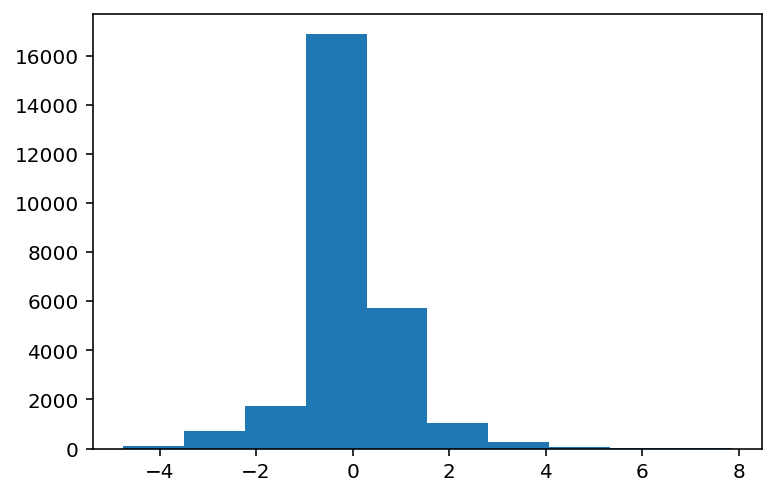

In [144]:
plt.hist(vit_data.TPM)

In [152]:
from src.data_loader import ViTDataLoader
from src.vit_train import load_model_dir, ViTTrainer
from src.vit_data import load_cd_data_24x128_p1


vit_data = load_cd_data_24x128_p1('merge', 0, 'logfold')


In [157]:
vit_data.TPM.shape

(26562,)